# Analysis for MSAs

# Setup

## Imports

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Parameters

In [2]:
MSA_FINAL_DATASET = "../../../data/RQ3/processed/msa_final_df.csv"

## Configuration

In [3]:
%matplotlib inline

In [4]:
#For diabetes death estimates
%store -r lower_q
%store -r upper_q
%store -r mean

# Loading the Dataset

In [5]:
msa_final_df = pd.read_csv(MSA_FINAL_DATASET)
msa_final_df.head()

,MSA,Population,Population Density,Diagnosed Diabetes Percentage,Murder and nonnegligent manslaughter
0,"Abilene, TX M.S.A.",170417,62.302643,7.500,9
1,"Akron, OH M.S.A.",704283,822.497761,9.350,45
2,"Albany, GA M.S.A.",147142,104.043825,9.675,17
3,"Albany-Schenectady-Troy, NY M.S.A.",871741,384.616247,8.520,19
4,"Albuquerque, NM M.S.A.",915468,174.850723,8.575,87


In [6]:
df = msa_final_df.copy()

### Include Estimates

In [7]:
df['Number of Pop Diagnosed'] = (df['Diagnosed Diabetes Percentage'] / 100) * df['Population']
df.head()

,MSA,Population,Population Density,Diagnosed Diabetes Percentage,Murder and nonnegligent manslaughter,Number of Pop Diagnosed
0,"Abilene, TX M.S.A.",170417,62.302643,7.500,9,12781.2750
1,"Akron, OH M.S.A.",704283,822.497761,9.350,45,65850.4605
2,"Albany, GA M.S.A.",147142,104.043825,9.675,17,14235.9885
3,"Albany-Schenectady-Troy, NY M.S.A.",871741,384.616247,8.520,19,74272.3332
4,"Albuquerque, NM M.S.A.",915468,174.850723,8.575,87,78501.3810


In [8]:
df['Number of Pop Diagnosed'].describe()

count       307.000000
mean      52592.817913
std       77029.140905
min        4956.714000
25%       13440.020000
50%       22150.763333
75%       54001.960000
max      640637.506250
Name: Number of Pop Diagnosed, dtype: float64

In [9]:
df['lower_death_est'] = df['Number of Pop Diagnosed'] * lower_q
df.head()

,MSA,Population,Population Density,Diagnosed Diabetes Percentage,Murder and nonnegligent manslaughter,Number of Pop Diagnosed,lower_death_est
0,"Abilene, TX M.S.A.",170417,62.302643,7.500,9,12781.2750,31.459680
1,"Akron, OH M.S.A.",704283,822.497761,9.350,45,65850.4605,162.083549
2,"Albany, GA M.S.A.",147142,104.043825,9.675,17,14235.9885,35.040295
3,"Albany-Schenectady-Troy, NY M.S.A.",871741,384.616247,8.520,19,74272.3332,182.813048
4,"Albuquerque, NM M.S.A.",915468,174.850723,8.575,87,78501.3810,193.222377


In [10]:
df['lower_death_est'].describe()

count     307.000000
mean      129.451344
std       189.598622
min        12.200398
25%        33.081107
50%        54.521629
75%       132.919790
max      1576.857628
Name: lower_death_est, dtype: float64

In [11]:
df['higher_death_est'] = df['Number of Pop Diagnosed'] * upper_q
df.head()

,MSA,Population,Population Density,Diagnosed Diabetes Percentage,Murder and nonnegligent manslaughter,Number of Pop Diagnosed,lower_death_est,higher_death_est
0,"Abilene, TX M.S.A.",170417,62.302643,7.500,9,12781.2750,31.459680,38.185010
1,"Akron, OH M.S.A.",704283,822.497761,9.350,45,65850.4605,162.083549,196.733148
2,"Albany, GA M.S.A.",147142,104.043825,9.675,17,14235.9885,35.040295,42.531074
3,"Albany-Schenectady-Troy, NY M.S.A.",871741,384.616247,8.520,19,74272.3332,182.813048,221.894119
4,"Albuquerque, NM M.S.A.",915468,174.850723,8.575,87,78501.3810,193.222377,234.528714


In [12]:
df['higher_death_est'].describe()

count     307.000000
mean      157.124955
std       230.130287
min        14.808552
25%        40.153059
50%        66.177053
75%       161.334871
max      1913.952192
Name: higher_death_est, dtype: float64

In [13]:
df['mean_death_est'] = df['Number of Pop Diagnosed'] * mean
df.head()

,MSA,Population,Population Density,Diagnosed Diabetes Percentage,Murder and nonnegligent manslaughter,Number of Pop Diagnosed,lower_death_est,higher_death_est,mean_death_est
0,"Abilene, TX M.S.A.",170417,62.302643,7.500,9,12781.2750,31.459680,38.185010,35.470057
1,"Akron, OH M.S.A.",704283,822.497761,9.350,45,65850.4605,162.083549,196.733148,182.745431
2,"Albany, GA M.S.A.",147142,104.043825,9.675,17,14235.9885,35.040295,42.531074,39.507117
3,"Albany-Schenectady-Troy, NY M.S.A.",871741,384.616247,8.520,19,74272.3332,182.813048,221.894119,206.117458
4,"Albuquerque, NM M.S.A.",915468,174.850723,8.575,87,78501.3810,193.222377,234.528714,217.853734


In [14]:
df['mean_death_est'].describe()

count     307.000000
mean      145.953378
std       213.768035
min        13.755664
25%        37.298179
50%        61.471868
75%       149.863970
max      1777.870288
Name: mean_death_est, dtype: float64

### Deal with Outliers

In [15]:
df.sort_values('mean_death_est', ascending=False)

,MSA,Population,Population Density,Diagnosed Diabetes Percentage,Murder and nonnegligent manslaughter,Number of Pop Diagnosed,lower_death_est,higher_death_est,mean_death_est
128,"Houston-The Woodlands-Sugar Land, TX M.S.A.,",7020685,596.686709,9.125000,440,640637.506250,1576.857628,1913.952192,1777.870288
216,"Phoenix-Mesa-Chandler, AZ M.S.A.",4861204,280.893478,9.850000,222,478828.594000,1178.583073,1430.536034,1328.824994
235,"Riverside-San Bernardino-Ontario, CA M.S.A.",4595416,339.387468,9.600000,220,441159.936000,1085.865881,1317.998117,1224.288517
69,"Dallas-Plano-Irving, TX M.D.",5001330,921.617230,8.128571,241,406536.681429,1000.644609,1214.558569,1128.203516
272,"Tampa-St. Petersburg-Clearwater, FL M.S.A.",3135589,1525.537826,9.150000,119,286906.393500,706.188025,857.154187,796.210567
...,...,...,...,...,...,...,...,...,...
183,"Midland, MI M.S.A.",83544,161.206780,7.500000,1,6265.800000,15.422566,18.719543,17.388585
161,"Lewiston, ID-WA M.S.A.",63627,35.548011,9.000000,1,5726.430000,14.094967,17.108135,15.891748
71,"Danville, IL M.S.A.",77051,85.379075,7.400000,16,5701.774000,14.034280,17.034474,15.823324
86,"Enid, OK M.S.A.",61489,57.720105,8.300000,3,5103.587000,12.561909,15.247346,14.163260


In [16]:
df = df[np.abs(df['mean_death_est']-df['mean_death_est'].mean()) <= (3*df['mean_death_est'].std())]
df.sort_values('mean_death_est', ascending=False)

,MSA,Population,Population Density,Diagnosed Diabetes Percentage,Murder and nonnegligent manslaughter,Number of Pop Diagnosed,lower_death_est,higher_death_est,mean_death_est
186,"Minneapolis-St. Paul-Bloomington, MN-WI M.S.A.",3619258,798.108751,7.258333,70,262697.809833,646.601301,784.829243,729.027923
8,"Anaheim-Santa Ana-Irvine, CA M.D.",3191133,4017.320414,8.000000,49,255290.640000,628.369381,762.699772,708.471857
209,"Orlando-Kissimmee-Sanford, FL M.S.A.",2566617,925.201946,9.475000,139,243186.960750,598.577527,726.539130,674.882235
51,"Charlotte-Concord-Gastonia, NC-SC M.S.A.",2597260,474.328678,9.245455,136,240128.492727,591.049450,717.401730,666.394503
100,"Fort Worth-Arlington-Grapevine, TX M.D.",2456788,718.654850,9.725000,87,238922.633000,588.081361,713.799134,663.048052
...,...,...,...,...,...,...,...,...,...
183,"Midland, MI M.S.A.",83544,161.206780,7.500000,1,6265.800000,15.422566,18.719543,17.388585
161,"Lewiston, ID-WA M.S.A.",63627,35.548011,9.000000,1,5726.430000,14.094967,17.108135,15.891748
71,"Danville, IL M.S.A.",77051,85.379075,7.400000,16,5701.774000,14.034280,17.034474,15.823324
86,"Enid, OK M.S.A.",61489,57.720105,8.300000,3,5103.587000,12.561909,15.247346,14.163260


In [17]:
df.sort_values('Murder and nonnegligent manslaughter', ascending=False)

,MSA,Population,Population Density,Diagnosed Diabetes Percentage,Murder and nonnegligent manslaughter,Number of Pop Diagnosed,lower_death_est,higher_death_est,mean_death_est
215,"Philadelphia, PA M.D.",2151872,7441.809594,9.700000,394,208731.584,513.769467,623.601130,579.263121
17,"Baltimore-Columbia-Towson, MD M.S.A.",2799376,906.784642,8.500000,373,237946.960,585.679851,710.884238,660.340405
265,"St. Louis, MO-IL M.S.A., , ,",2806936,121.755267,8.127273,360,228127.344,561.509963,681.547405,633.089419
76,"Detroit-Dearborn-Livonia, MI M.D.",1748511,2866.378578,11.000000,293,192336.210,473.414087,574.618731,533.763368
182,"Miami-Miami Beach-Kendall, FL M.D.",2786840,1430.587231,7.100000,198,197865.640,487.024161,591.138314,549.108410
...,...,...,...,...,...,...,...,...,...
291,"Watertown-Fort Drum, NY M.S.A.",111731,88.181367,10.100000,0,11284.831,27.776350,33.714272,31.317189
301,"Winchester, VA-WV M.S.A.",138929,124.858427,8.700000,0,12086.823,29.750364,36.110283,33.542843
131,"Ithaca, NY M.S.A",103272,215.777942,6.500000,0,6712.680,16.522512,20.054631,18.628747
63,"Columbus, IN M.S.A.",82793,203.293111,9.600000,0,7948.128,19.563429,23.745623,22.057311


In [18]:
df = df[np.abs(df['Murder and nonnegligent manslaughter']-df['Murder and nonnegligent manslaughter'].mean()) <= (3*df['Murder and nonnegligent manslaughter'].std())]
df.sort_values('Murder and nonnegligent manslaughter', ascending=False)

,MSA,Population,Population Density,Diagnosed Diabetes Percentage,Murder and nonnegligent manslaughter,Number of Pop Diagnosed,lower_death_est,higher_death_est,mean_death_est
158,"Las Vegas-Henderson-Paradise, NV M.S.A.",2236094,282.092726,10.000000,169,223609.400000,550.389549,668.049712,620.551411
200,"Nashville-Davidson–Murfreesboro–Franklin, TN M...",1913148,287.171061,8.430769,150,161293.092923,397.004923,481.875110,447.613814
209,"Orlando-Kissimmee-Sanford, FL M.S.A.",2566617,925.201946,9.475000,139,243186.960750,598.577527,726.539130,674.882235
51,"Charlotte-Concord-Gastonia, NC-SC M.S.A.",2597260,474.328678,9.245455,136,240128.492727,591.049450,717.401730,666.394503
249,"San Antonio-New Braunfels, TX M.S.A.,",2516781,291.505139,8.000000,135,201342.480000,495.582014,601.525632,558.757190
...,...,...,...,...,...,...,...,...,...
131,"Ithaca, NY M.S.A",103272,215.777942,6.500000,0,6712.680000,16.522512,20.054631,18.628747
31,"Bloomsburg-Berwick, PA M.S.A",83914,137.519550,7.800000,0,6545.292000,16.110505,19.554547,18.164219
301,"Winchester, VA-WV M.S.A.",138929,124.858427,8.700000,0,12086.823000,29.750364,36.110283,33.542843
63,"Columbus, IN M.S.A.",82793,203.293111,9.600000,0,7948.128000,19.563429,23.745623,22.057311


In [19]:
df2 = df.copy()

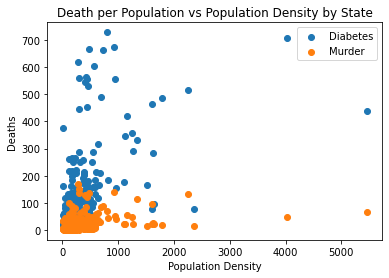

In [20]:
fig, ax = plt.subplots()
plt.scatter(df2['Population Density'], df2['mean_death_est'], label="Diabetes")
plt.scatter(df2['Population Density'], df2['Murder and nonnegligent manslaughter'], label="Murder")
plt.title("Death per Population vs Population Density by State")
plt.xlabel("Population Density")
plt.ylabel("Deaths")
plt.legend()
plt.show()

### Create Deaths Per Population

In [21]:
df2['Diabetes Death per Pop'] = df2['mean_death_est'] / df2['Population']
df2['Violence Death per Pop'] = df2['Murder and nonnegligent manslaughter'] / df2['Population']
df2.head()

,MSA,Population,Population Density,Diagnosed Diabetes Percentage,Murder and nonnegligent manslaughter,Number of Pop Diagnosed,lower_death_est,higher_death_est,mean_death_est,Diabetes Death per Pop,Violence Death per Pop
0,"Abilene, TX M.S.A.",170417,62.302643,7.500,9,12781.2750,31.459680,38.185010,35.470057,0.000208,0.000053
1,"Akron, OH M.S.A.",704283,822.497761,9.350,45,65850.4605,162.083549,196.733148,182.745431,0.000259,0.000064
2,"Albany, GA M.S.A.",147142,104.043825,9.675,17,14235.9885,35.040295,42.531074,39.507117,0.000268,0.000116
3,"Albany-Schenectady-Troy, NY M.S.A.",871741,384.616247,8.520,19,74272.3332,182.813048,221.894119,206.117458,0.000236,0.000022
4,"Albuquerque, NM M.S.A.",915468,174.850723,8.575,87,78501.3810,193.222377,234.528714,217.853734,0.000238,0.000095


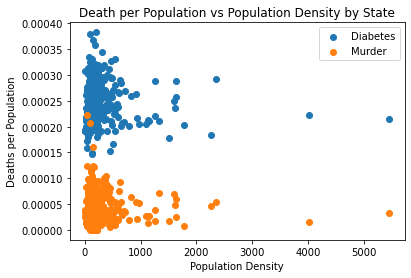

In [22]:
fig, ax = plt.subplots()
plt.scatter(df2['Population Density'], df2['Diabetes Death per Pop'], label="Diabetes")
plt.scatter(df2['Population Density'], df2['Violence Death per Pop'], label="Murder")
plt.title("Death per Population vs Population Density by State")
plt.xlabel("Population Density")
plt.ylabel("Deaths per Population")
plt.legend()
plt.show()

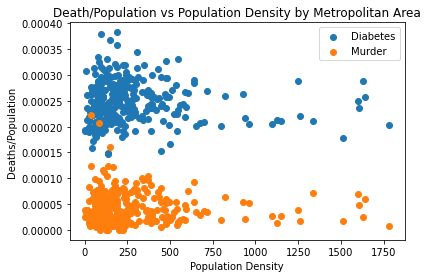

In [23]:
#Remove Pop Density outliers
df3 = df2[df2['Population Density'] <2000]

fig, ax = plt.subplots()
plt.scatter(df3['Population Density'], df3['Diabetes Death per Pop'], label="Diabetes")
plt.scatter(df3['Population Density'], df3['Violence Death per Pop'], label="Murder")
plt.title("Death/Population vs Population Density by Metropolitan Area")
plt.xlabel("Population Density")
plt.ylabel("Deaths/Population")
plt.legend()
plt.show()

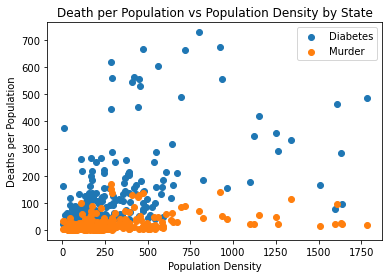

In [24]:
fig, ax = plt.subplots()
plt.scatter(df3['Population Density'], df3['mean_death_est'], label="Diabetes")
plt.scatter(df3['Population Density'], df3['Murder and nonnegligent manslaughter'], label="Murder")
plt.title("Death per Population vs Population Density by State")
plt.xlabel("Population Density")
plt.ylabel("Deaths per Population")
plt.legend()
plt.show()

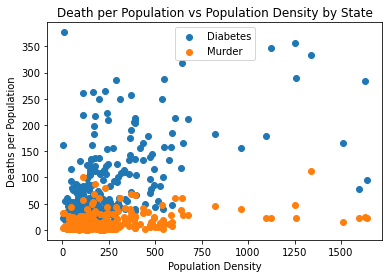

In [25]:
df4 = df3[(df3['mean_death_est'] < 400)]

fig, ax = plt.subplots()
plt.scatter(df4['Population Density'], df4['mean_death_est'], label="Diabetes")
plt.scatter(df4['Population Density'], df4['Murder and nonnegligent manslaughter'], label="Murder")
plt.title("Death per Population vs Population Density by State")
plt.xlabel("Population Density")
plt.ylabel("Deaths per Population")
plt.legend()
plt.show()

In [26]:
#Are there and MSA's that have greater number of violence deaths than diabetes deaths?
df5 = df2[df2['Diabetes Death per Pop'] < df2['Violence Death per Pop']]

In [27]:
df7 = df.copy()
df7['Diabetes Death per Pop'] = df7['mean_death_est'] / df7['Population']
df7['Violence Death per Pop'] = df7['Murder and nonnegligent manslaughter'] / df7['Population']
df7.head()

,MSA,Population,Population Density,Diagnosed Diabetes Percentage,Murder and nonnegligent manslaughter,Number of Pop Diagnosed,lower_death_est,higher_death_est,mean_death_est,Diabetes Death per Pop,Violence Death per Pop
0,"Abilene, TX M.S.A.",170417,62.302643,7.500,9,12781.2750,31.459680,38.185010,35.470057,0.000208,0.000053
1,"Akron, OH M.S.A.",704283,822.497761,9.350,45,65850.4605,162.083549,196.733148,182.745431,0.000259,0.000064
2,"Albany, GA M.S.A.",147142,104.043825,9.675,17,14235.9885,35.040295,42.531074,39.507117,0.000268,0.000116
3,"Albany-Schenectady-Troy, NY M.S.A.",871741,384.616247,8.520,19,74272.3332,182.813048,221.894119,206.117458,0.000236,0.000022
4,"Albuquerque, NM M.S.A.",915468,174.850723,8.575,87,78501.3810,193.222377,234.528714,217.853734,0.000238,0.000095


In [28]:
print("Ratio of average diabetes deaths to violent crime deaths:", df7['Diabetes Death per Pop'].mean()/df7['Violence Death per Pop'].mean())

Ratio of average diabetes deaths to violent crime deaths: 5.815569668218467


In [29]:
df['Diabetes Death per Pop'] = df['mean_death_est'] / df['Population']
df['Violence Death per Pop'] = df['Murder and nonnegligent manslaughter'] / df['Population']
df8 = df[df['Diabetes Death per Pop'] < df['Violence Death per Pop']]


In [30]:
df8

,MSA,Population,Population Density,Diagnosed Diabetes Percentage,Murder and nonnegligent manslaughter,Number of Pop Diagnosed,lower_death_est,higher_death_est,mean_death_est,Diabetes Death per Pop,Violence Death per Pop
71,"Danville, IL M.S.A.",77051,85.379075,7.4,16,5701.774,14.03428,17.034474,15.823324,0.000205,0.000208


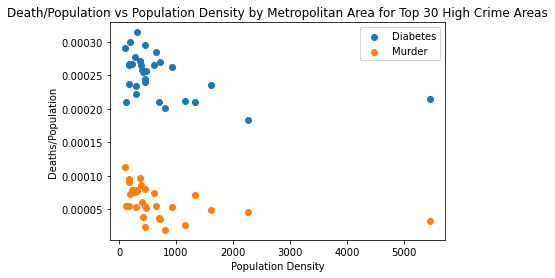

In [31]:
df9 = df.sort_values('Murder and nonnegligent manslaughter', ascending=False).head(30)

fig, ax = plt.subplots()
plt.scatter(df9['Population Density'], df9['Diabetes Death per Pop'], label="Diabetes")
plt.scatter(df9['Population Density'], df9['Violence Death per Pop'], label="Murder")
plt.title("Death/Population vs Population Density by Metropolitan Area for Top 30 High Crime Areas")
plt.xlabel("Population Density")
plt.ylabel("Deaths/Population")
plt.legend()
plt.show()

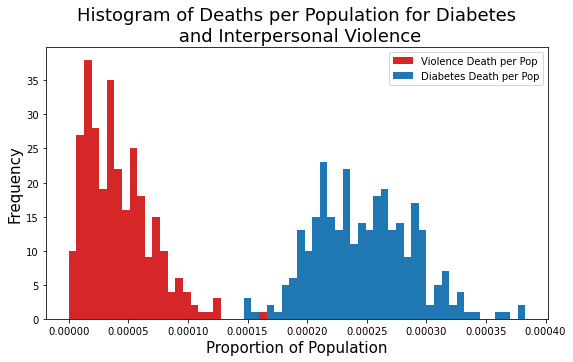

In [39]:
newdf = df2[['Violence Death per Pop', 'Diabetes Death per Pop']].copy()

newdf.plot.hist(figsize = (9, 5), bins=60, color=['tab:red', 'tab:blue'])

plt.xlabel("Proportion of Population", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Histogram of Deaths per Population for Diabetes\n and Interpersonal Violence", fontsize=18)
plt.savefig('../../../graphs/histogram_of_deaths_per_pop.png', bbox_inches='tight')
fig.savefig('../../../graphs/histogram_of_deaths_for_diabetes_violence.png', bbox_inches='tight')
plt.show()

In [33]:
avg_diabetes_deaths = df2['mean_death_est'].mean()
avg_crime_deaths = df2['Murder and nonnegligent manslaughter'].mean()

In [34]:
avg_diabetes_deaths

118.32796203115444

In [35]:
avg_crime_deaths

20.760135135135137

In [36]:
#Ttest
test1 = stats.ttest_1samp(df2['mean_death_est'], 0)
test2 = stats.ttest_1samp(df2['Murder and nonnegligent manslaughter'], 0) 
ttest = stats.ttest_ind(df2['mean_death_est'], df2['Murder and nonnegligent manslaughter'], equal_var = False)   
t = ttest[0]
p = ttest[1]
t = round(t, 3)
p = '{:0.3e}'.format(p)
print("T statistic: ", t, "\np value: ", p)

T statistic:  11.575 
p value:  4.167e-26


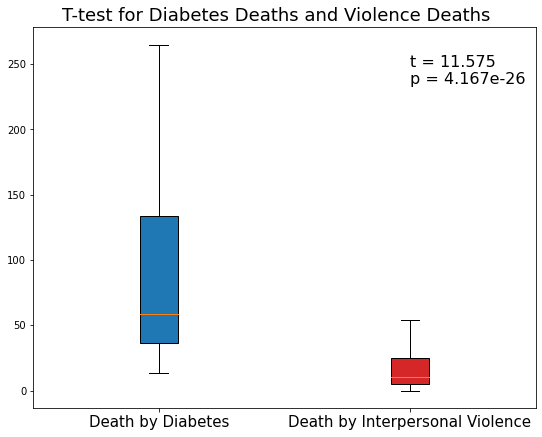

In [37]:
data1 = df2['mean_death_est']
data2 = df2['Murder and nonnegligent manslaughter']

data = [data1, data2]

data_labels = ['Death by Diabetes', 'Death by Interpersonal Violence']


fig, axs = plt.subplots(figsize=(9,7))



bplot1 = axs.boxplot(data,
                     showfliers=False,
                     vert=True, 
                     patch_artist=True,  
                     labels=data_labels) 

colors = ['tab:blue', 'tab:red']

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
axs.xaxis.label.set_size(40)
    
plt.annotate('t = {} \np = {}'.format(t, p), fontsize=16, xy=(0.75, 0.85), xycoords='axes fraction')
plt.xticks(fontsize=15)
fig.suptitle("T-test for Diabetes Deaths and Violence Deaths", fontsize=18, y=0.92)
fig.savefig('../../../graphs/ttest_for_diabetes_violence_deaths.png', bbox_inches='tight')
plt.show()

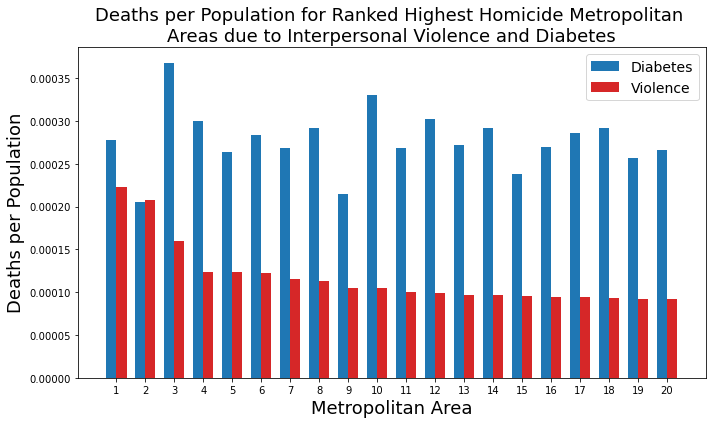

In [38]:
newdf = df2[['MSA', 'Violence Death per Pop', 'Diabetes Death per Pop']].copy()
newdf = newdf.sort_values('Violence Death per Pop', ascending = False)
newdf = newdf.head(20)

labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]#,21,22,23,24,25,26,27,28,29,30]
diabetes = newdf['Diabetes Death per Pop'].tolist()
violence = newdf['Violence Death per Pop'].tolist()

x = np.arange(len(labels))
width = 0.35  

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, diabetes, width, color='tab:blue', label='Diabetes')
rects2 = ax.bar(x + width/2, violence, width, color='tab:red', label='Violence')

ax.set_ylabel('Deaths per Population', fontsize=18)
ax.set_xlabel('Metropolitan Area', fontsize=18)
ax.set_title('Deaths per Population for Ranked Highest Homicide Metropolitan \nAreas due to Interpersonal Violence and Diabetes', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
fig.tight_layout()
fig.savefig('../../../graphs/deaths_per_pop_for_ranked_homicide_MSA.png', bbox_inches='tight')
plt.show()